https://mset.space - платформа для проведения анализа данных, построения моделей и внедрения моделей в продукцию.


https://mset.space - platform for data analysis, model building and implementation into production.


Ноутбуки для платформы mset.space
https://github.com/MindSetLib/MS-Education

Low code ML - библиотека машинного обучения
https://github.com/MindSetLib/Insolver


Телеграм канал платформы
https://t.me/msetspace

Связь с разработчиками:
telegram: @frankshikhaliev
email: request@mind-set.ru

![](https://developer.nvidia.com/sites/default/files/pictures/2018/rapids/rapids-logo.png)

[Rapids](https://medium.com/dropout-analytics/installing-rapids-ai-in-google-colab-87c247f2c468) — набор программных библиотек, предназначенных для ускорения Data Science за счет использования графических процессоров. Он генерирует низкоуровневый код CUDA для быстрого выполнения алгоритмов, оптимизированных на GPU, и в то же время имеет простую реализацию на Python.

Rapids использует несколько Python-библиотек:

— [cuDF](https://github.com/rapidsai/cudf): dataframes для GPU. Поддерживает практически те же способы обработки данных, что и Pan

— [cuPY](https://github.com/rapidsai/cupy): используем методы из Numpy, вычисляем на            das.

— [cuML](https://github.com/rapidsai/cuml): библиотека для машинного обучения. Содержит множество алгоритмов ML, которые есть в Scikit-Learn.

— [cuGraph](https://github.com/rapidsai/cugraph): обработка графов на GPU. Поддерживает много основных алгоритмов анализа графов, включая PageRank.

22.12.2020

## Установка mset.space
#### В терминале создаем новое окружение и устанавливаем RAPIDS:
```shell
conda create -n rapids-0.17 -c rapidsai -c nvidia -c conda-forge \
    -c defaults rapids-blazing=0.17 python=3.7 cudatoolkit=10.2
```
```shell
conda install -c conda-forge nb_conda_kernels
```

#### conda и перезапускаем терминал:
```
conda init

exit
```

#### активируем виртуальное окружение:
```shell
conda activate rapids-0.17
```

#### добавляем новый кернел в ноутбук:
```shell
conda install ipykernel

ipython kernel install --user --name rapids --display-name="Python 3.7 RAPIDS"
```


Посмотрим к какой GPU подключились. 

In [105]:
!nvidia-smi

Tue Jan 12 16:56:01 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.118.02   Driver Version: 440.118.02   CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  On   | 00000000:95:00.0 Off |                  N/A |
|  0%   41C    P8     9W / 250W |   4979MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  On   | 00000000:CB:00.0 Off |                  N/A |
|  0%   34C    P8    10W / 250W |    147MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

Посмотрим, есть ли установленные библиотеки cuDF, cuMl и остальные.

In [57]:
import sys
!conda list --prefix {sys.prefix} | grep cu

arrow-cpp                 1.0.1           py37h2318771_14_cuda    conda-forge
arrow-cpp-proc            2.0.0                      cuda    conda-forge
cudatoolkit               10.2.89              h6bb024c_0    nvidia
cudf                      0.17.0          cuda_10.2_py37_gf56ef850e6_0    rapidsai
cudf_kafka                0.17.0          py37_gf56ef850e6_0    rapidsai
cudnn                     7.6.5.32             h01f27c4_1    conda-forge
cugraph                   0.17.0          py37_gb58e49e8_0    rapidsai
cuml                      0.17.0          cuda10.2_py37_ga48e0ffbf_0    rapidsai
cupy                      8.3.0            py37h3e89ef8_0    conda-forge
curl                      7.71.1               he644dc0_8    conda-forge
cusignal                  0.17.0          py38_ge853242_0    rapidsai
cuspatial                 0.17.0          py37_g897b304_0    rapidsai
custreamz                 0.17.0          py37_gf56ef850e6_0    rapidsai
cuxfilter                 0.17.0         

### Скачаем датасет с Kaggle

In [36]:
# установим библиотеку kaggle
!pip install -U -q kaggle
# создадим дирректорию, куда положим файл kaggle.json
!mkdir -p ~/.kaggle

In [37]:
# копируем в дирректорию, которую мы создали, файл kaggle.json
!cp kaggle.json ~/.kaggle/

In [38]:
# посмотрим, скачался ли файл в созданную дирректорию
!ls ~/.kaggle/

kaggle.json


In [41]:
# без этого выходит ошибка
# Warning: Your Kaggle API key is readable by other users on this system! To fix this, you can run 'chmod 600 /root/.kaggle/kaggle.json'
!sudo chmod 600 ~/.kaggle/kaggle.json

Чтобы скачать dataset:
* переходим на страницу датасета в Kaggle
* ищем код для скачивания датасета

![](https://s8.hostingkartinok.com/uploads/images/2021/01/97090108e4a6db2a86d1b002a6bab270.png)

Скачаем из Kaggle датасет [Riiid](https://www.kaggle.com/c/riiid-test-answer-prediction/data). Это данные онлайн школы, по которым необходимо предсказать, сможет ли учащийся ответить на следующий вопрос.

Мы возьмем данные из файла train.csv

* `row_id`: (int64) ID code for the row.
* `timestamp`: (int64) the time in milliseconds between this user interaction and the first event completion from that user.
* `user_id`: (int32) ID code for the user.
* `content_id`: (int16) ID code for the user interaction.
* `content_type_id`: (bool) 0 if the event was a question being posed to the user, 1 if the event was the user watching a lecture.
* `task_container_id`: (int16) ID code for the *batch of questions or lectures*. (eg. a user might see three questions in a row before seeing the explanations for any of them - those three would all share a task_container_id)
* `user_answer`: (int8) the user's answer to the question, if any. Read -1 as null, for lectures.
* `answered_correctly`: (int8) if the user responded correctly. Read -1 as null, for lectures.
* `prior_question_elapsed_time`: (float32) The average time in milliseconds it took a user to answer each question in the previous question bundle, ignoring any lectures in between (is null for a user's first question bundle or lecture)
* `prior_question_had_explanation`: (bool) Whether or not the user saw an explanation and the correct response(s) after answering the previous question bundle, ignoring any lectures in between. The value is shared across a single question bundle, and is null for a user's first question bundle or lecture. Typically the first several questions a user sees were part of an onboarding diagnostic test where they did not get any feedback.

In [42]:
!kaggle competitions download -c riiid-test-answer-prediction

100%|██████████████████████████████████████| 1.29G/1.29G [02:08<00:00, 11.7MB/s]
100%|██████████████████████████████████████| 1.29G/1.29G [02:08<00:00, 10.8MB/s]


Воспользуемся библиотекой ZipFile, чтобы распаковать скачанный архив с данными.

In [43]:
from zipfile import ZipFile
zip_file = ZipFile('riiid-test-answer-prediction.zip')

Извлечем все файлы из архива.

In [44]:
zip_file.extractall()

Посмотрим размер файла с данными

In [45]:
!du -sh train.csv

5.5G	train.csv


In [46]:
# установка библиотеки через conda в текущий кернел

import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



Импортируем библиотеки

In [50]:
import cudf # pandas на GPU
import cupy # numpy на GPU

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# управление памятью на GPU: подробнее https://medium.com/rapids-ai/tackling-large-graphs-with-rapids-cugraph-and-unified-virtual-memory-b5b69a065d4
import rmm
rmm.reinitialize(managed_memory=True)
assert(rmm.is_initialized())

### Сравнение методов загрузки

Посмотрим, сколько времени займёт загрузка данных, если будем использовать CPU?

В итоге данные загрузили через 15 минутGB.

In [ ]:
#%%time#pandas_train = pd.read_csv('train.csv')

In [ ]:
def memory_usage(data):
  print( 'Занимаемая память:', np.round( data.memory_usage().sum() / 10**9, 2), 'GB' )

In [59]:
memory_usage(pandas_train)         

Занимаемая память: 8.1 GB


Посмотрим сколько времени займёт загрузка данных, используя cuDF.

Вывод:

*   время загрузки 2min 43s
*   память 7.42 GB при размере файла 5.5 GB



In [103]:
%%time
rapids_train = cudf.read_csv('train.csv')

CPU times: user 37 s, sys: 4.93 s, total: 41.9 s
Wall time: 41.6 s


Напишем функцию для отображение занимаемого объема памяти.

In [66]:
memory_usage(rapids_train)

Занимаемая память: 7.42 GB


Удалим данные из GPU.

In [10]:
del rapids_train

Если мы вручную определим тип данных, то мы значительно сэкономим память.

[Посмотреть числовые типы данных](https://pyprog.pro/data_types.html) и какой диапазон чисел они в себе хранят.

Загрузим датасет используя Pandas.

Вывод:

*   время ззгру4ки 24in 39s
*   память 3.64 GB
*   тип данных **pandas.core.frame.DataFrame**



In [68]:
%%time
dtypes = {
    "row_id": "int32",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "int8"
}

pandas_train = pd.read_csv('train.csv', dtype=dtypes)

CPU times: user 4min 35s, sys: 14.3 s, total: 4min 49s
Wall time: 4min 49s


In [69]:
memory_usage(pandas_train)

Занимаемая память: 3.64 GB


In [70]:
type(pandas_train)

pandas.core.frame.DataFrame

In [14]:
del pandas_train

Загрузим датасет используя Rapids.

Вывод:

*   время ззкиу1in 43s
*   память 2.86 GB
*   тип данных **cudf.core.dataframe.DataFrame**

In [71]:
%%time
dtypes = {
    "row_id": "int32",
    "timestamp": "int64",
    "user_id": "int32",
    "content_id": "int16",
    "content_type_id": "boolean",
    "task_container_id": "int16",
    "user_answer": "int8",
    "answered_correctly": "int8",
    "prior_question_elapsed_time": "float32", 
    "prior_question_had_explanation": "int8"
}

rapids_train = cudf.read_csv('train.csv', dtype=dtypes)

CPU times: user 11.3 s, sys: 1.95 s, total: 13.2 s
Wall time: 13.3 s


In [72]:
memory_usage(rapids_train)

Занимаемая память: 2.86 GB


Посмотрим какой тип данных имеет загруженный датасет.

In [73]:
type(rapids_train)

cudf.core.dataframe.DataFrame

Составим таблицу для наглядного сравнения.

In [74]:
pd.DataFrame({'Характеристики': ['время', 'память', 'тип данных'], 'Pandas': ['4min 49 sec', '3.64 GB', 'pandas.core.frame.DataFrame'], 'Rapids': ['13 sec', '2.86 GB', 'cudf.core.dataframe.DataFrame']})

,Характеристики,Pandas,Rapids
0,время,4min 49 sec,13 sec
1,память,3.64 GB,2.86 GB
2,тип данных,pandas.core.frame.DataFrame,cudf.core.dataframe.DataFrame


Посмотрим какие есть методы у данного типа данных.

In [ ]:
dir(rapids_train)

In [76]:
rapids_train

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,False,1,3,1,<NA>,<NA>
1,1,56943,115,5716,False,2,2,1,37000.0,0
2,2,118363,115,128,False,0,0,1,55000.0,0
3,3,131167,115,7860,False,3,0,1,19000.0,0
4,4,137965,115,7922,False,4,1,1,11000.0,0
...,...,...,...,...,...,...,...,...,...,...
101230327,101230327,428564420,2147482888,3586,False,22,0,1,18000.0,1
101230328,101230328,428585000,2147482888,6341,False,23,3,1,14000.0,1
101230329,101230329,428613475,2147482888,4212,False,24,3,1,14000.0,1
101230330,101230330,428649406,2147482888,6343,False,25,1,0,22000.0,1


Для данных `cudf.core.dataframe.DataFrame` доступны все методы используемые в Pandas. И они будут выполнятся на GPU.

Посмотрим, сколько пропущенных значений в каждом столбце.

In [77]:
rapids_train.isnull().sum()

row_id                                  0
timestamp                               0
user_id                                 0
content_id                              0
content_type_id                         0
task_container_id                       0
user_answer                             0
answered_correctly                      0
prior_question_elapsed_time       2351538
prior_question_had_explanation     392506
dtype: uint64

#### Оптимальный формат хранения данных

Чтобы эффективнее хранить и загружать данные, предпочтительно хранить их в форматах: `parquet`, `pickle`, `feather`, `hdf5`, `jay`. Подробнее о всех можно посмотреть в конце [этого ноутбука](https://www.kaggle.com/rohanrao/tutorial-on-reading-large-datasets).

Продемонстрируем тип данных `parquet`.

In [78]:
%%time
rapids_train.to_parquet('train.parquet')

CPU times: user 6.21 s, sys: 2.56 s, total: 8.77 s
Wall time: 8.77 s


Как видим, данные в формате CSV весили 5.5 G, а в формате parquet 1.5 G

In [79]:
!du -sh train.parquet

1.5G	train.parquet


А загрузка данных происходит всего за 5.17 секунд!

In [80]:
%%time 
parquet_train = pd.read_parquet('train.parquet')

CPU times: user 28.3 s, sys: 1min 6s, total: 1min 34s
Wall time: 5.17 s


In [28]:
type(parquet_train)

pandas.core.frame.DataFrame

Данные мы загрузили на оперативную память, которая занимает 3.5 G

In [81]:
memory_usage(parquet_train)

Занимаемая память: 3.54 GB


In [82]:
del parquet_train

### Визуализация

Построим график распределения фичи `timestamp`.

Посмотрим какой тип данных имеют значения при применении метода `values`.

In [83]:
# посмотрим какой тип данных имеют значения столбца timestamp
type(rapids_train['timestamp'].values)

cupy.core.core.ndarray

Чтобы строить графики используя стандартные методы библиотек `matplotlib`, `seaborn` и др., нам нужно изменить тип данных на numpy.ndarray для этого воспользуемся методом **cupy.asnumpy**

In [84]:
type(cupy.asnumpy(rapids_train['timestamp'].values))

numpy.ndarray

Построим график

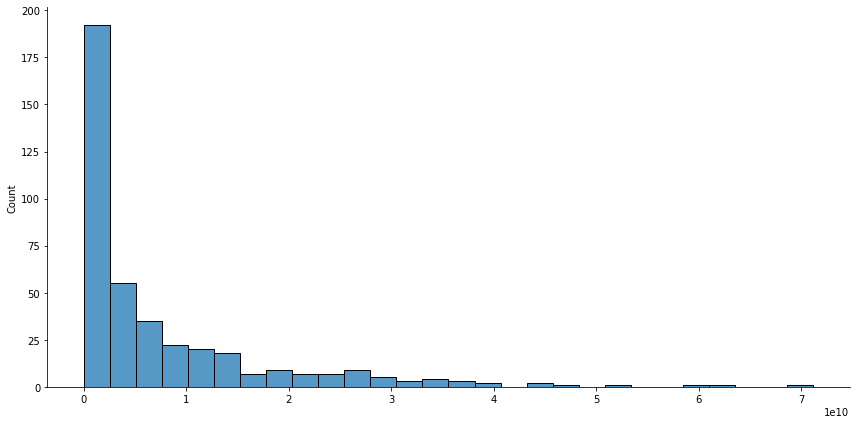

In [85]:
values = cupy.asnumpy(rapids_train['timestamp'].values)

# [::k] брать каждое k-ое значение из массива
# height: высота графика
# aspect: длина графика height * aspect
sns.displot(values[::250000], kind = 'hist', height = 6, aspect = 2); 

### Сравнение скорости вычислений

Используем метод `rolling`, который берет окно указанного размера и складывает значения из этого окна по столбцам. Используем этот метод для сравнения скорости обработки на CPU и GPU. 

![](https://s8.hostingkartinok.com/uploads/images/2020/12/7464fb4473a28f0e2d890dae40374928.png)

Произвести вычисления на всём датасете нельзя, ноутбук перезагружается т.к. не хватает RAM для этой операции. Поэтому произведем эту операцию на 1/4 данных. 

In [86]:
%%time
n = pandas_train.shape[0]
pandas_train.iloc[: int(n * 0.25), : ].rolling(2).sum()

CPU times: user 17.7 s, sys: 11.9 s, total: 29.6 s
Wall time: 29.8 s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,5.694300e+04,2.300000e+02,11408.0,0.0,3.0,5.0,2.0,NaN,1.0
2,3.0,1.753060e+05,2.300000e+02,5844.0,0.0,2.0,2.0,2.0,92000.0,0.0
3,5.0,2.495300e+05,2.300000e+02,7988.0,0.0,3.0,0.0,2.0,74000.0,0.0
4,7.0,2.691320e+05,2.300000e+02,15782.0,0.0,7.0,1.0,2.0,30000.0,0.0
...,...,...,...,...,...,...,...,...,...,...
25307578,50615155.0,1.001047e+09,1.081623e+09,10913.0,0.0,89.0,2.0,2.0,31000.0,2.0
25307579,50615157.0,1.394559e+10,1.081623e+09,10221.0,0.0,91.0,1.0,2.0,35000.0,2.0
25307580,50615159.0,2.689012e+10,1.081623e+09,9054.0,0.0,93.0,0.0,2.0,41000.0,2.0
25307581,50615161.0,2.689015e+10,1.081623e+09,14166.0,0.0,95.0,3.0,2.0,36000.0,2.0


А для GPU возьмем все данные.

In [102]:
%%time
rapids_train.rolling(2).sum()

CPU times: user 5.53 s, sys: 94.3 ms, total: 5.62 s
Wall time: 5.61 s


,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,1,56943,230,11408,0,3,5,2,<NA>,<NA>
2,3,175306,230,5844,0,2,2,2,92000.0,0
3,5,249530,230,7988,0,3,0,2,74000.0,0
4,7,269132,230,15782,0,7,1,2,30000.0,0
...,...,...,...,...,...,...,...,...,...,...
101230327,202460653,857107292,4294965776,9788,0,43,2,2,62000.0,2
101230328,202460655,857149420,4294965776,9927,0,45,3,2,32000.0,2
101230329,202460657,857198475,4294965776,10553,0,47,6,2,28000.0,2
101230330,202460659,857262881,4294965776,10555,0,49,4,1,36000.0,2


### Пример использования моделей. Линейная регрессия.

Все доступные модели можно посмотреть в [документации](https://docs.rapids.ai/api/cuml/stable/api.html#).

In [88]:
import cudf
from cuml import make_regression, train_test_split
from cuml.linear_model import LinearRegression as cuLinearRegression
from cuml.metrics.regression import r2_score
from sklearn.linear_model import LinearRegression as skLinearRegression

Определим параметры

In [114]:
n_samples = 2**19
n_features = 399

random_state = 23

Сгенерируем данные

Можно воспользоваться готовыми генераторами датасетов из библиотеки cudf. И сгенерированные данные подавать напрямую в модель.

In [90]:
%%time
X, y = make_regression(n_samples=n_samples, n_features=n_features, random_state=random_state)
print('Тип данных после применения make_regression: ', type(X))

X_cudf, X_cudf_test, y_cudf, y_cudf_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

Тип данных после применения make_regression:  <class 'cupy.core.core.ndarray'>
CPU times: user 6.11 s, sys: 263 ms, total: 6.38 s
Wall time: 6.34 s


Посмотрим размеры датасетов и убедимся, что разделение произошло.

In [91]:
X.shape, X_cudf.shape

((524288, 399), (419431, 399))

Отправим данные на обучение модели.

In [93]:
%%time
cudf_model = cuLinearRegression()
cudf_model.fit(X_cudf, y_cudf)

CPU times: user 272 ms, sys: 56.6 ms, total: 328 ms
Wall time: 326 ms


LinearRegression(algorithm='eig', fit_intercept=True, normalize=False, handle=<cuml.raft.common.handle.Handle object at 0x7f2bccafc110>, verbose=4, output_type='input')

Но нам интересно сравнить время обработки данных на CPU и GPU, поэтому вначале сформируем датасет используя библиотеку Sklearn, потом конвертируем в формат `cudf.core.dataframe.DataFrame`.

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=n_samples, n_features=n_features, random_state=random_state)

X = pd.DataFrame(X)
y = pd.DataFrame(y)

X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

Теперь форматируем данные в нужный нам формат для вычисления на GPU.

In [95]:
X_cudf_train = cudf.DataFrame.from_pandas(X_df_train)
X_cudf_test = cudf.DataFrame.from_pandas(X_df_test)
y_cudf_train = cudf.DataFrame.from_pandas(y_df_train)
y_cudf_test = cudf.DataFrame.from_pandas(y_df_test)

In [96]:
print('Тип данных после применения cudf.DataFrame.from_pandas: ', type(X_cudf_train))

Тип данных после применения cudf.DataFrame.from_pandas:  <class 'cudf.core.dataframe.DataFrame'>


Тренировка

In [98]:
%%time
# sklearn
sklearn_model = skLinearRegression()
sklearn_model.fit(X_df_train, y_df_train)

CPU times: user 15min 38s, sys: 5min 58s, total: 21min 37s
Wall time: 31.6 s


LinearRegression()

In [99]:
%%time
# rapids
cudf_model = cuLinearRegression()
cudf_model.fit(X_cudf_train, y_cudf_train)

CPU times: user 2.08 s, sys: 179 ms, total: 2.26 s
Wall time: 2.26 s


LinearRegression(algorithm='eig', fit_intercept=True, normalize=False, handle=<cuml.raft.common.handle.Handle object at 0x7f2bc40835b0>, verbose=4, output_type='input')

Оценка

In [100]:
%%time
# sklearn
sk_predict = sklearn_model.predict(X_df_test)
r2_score(y_df_test, sk_predict)

CPU times: user 7.45 s, sys: 2.01 s, total: 9.46 s
Wall time: 3.69 s


1.0

In [101]:
%%time
# rapids
cudf_predict = cudf_model.predict(X_cudf_test)
r2_score(y_cudf_test, cudf_predict)

CPU times: user 574 ms, sys: 337 ms, total: 912 ms
Wall time: 861 ms


1.0

In [108]:
cudf_model.predict(X_df_t)

array([ 143.27340738,   48.26459335, -180.0854436 , ...,  324.38246265,
        -85.79407958,   12.81769663])

Пример работы библиотеки RAPIDS: https://www.kaggle.com/andradaolteanu/answer-correctness-rapids-xgb-lgbm

Туториалы по использованию библиотеки RAPIDS: https://github.com/rapidsai/noteboo

Документация RAPIDS: https://docs.rapids.ai/api/cuml/stable/api.htmlks